<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [38]:
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(url)

# Preview the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [39]:
df.to_csv("survey-data.csv")

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [40]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [41]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [42]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [43]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   Unnamed: 0  ResponseId                      MainBranch                 Age  \
0           0           1  I am a developer by profession  Under 18 years old   
1           1           2  I am a developer by profession     35-44 years old   
2           2           3  I am a developer by profession     45-54 years old   
3           3           4           I am learning to code     18-24 years old   
4           4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [44]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [45]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [46]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [47]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"Unnamed: 0" INTEGER,
  "ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTe

## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [49]:
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df.columns)



Index(['CompTotal'], dtype='object')


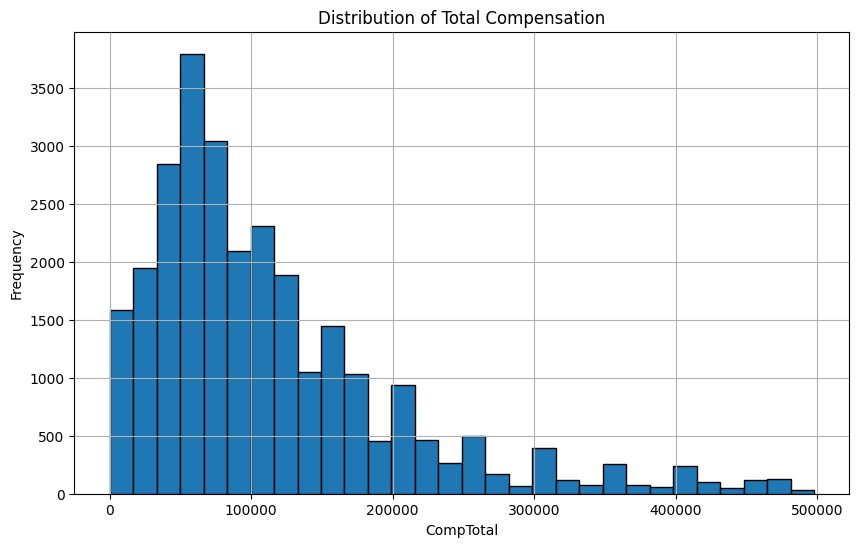

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect and load data
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)
conn.close()

# Convert and clean
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna()
df = df[df['CompTotal'] < 500000]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Box Plots**

Plot a box plot of Age.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load Age column
df = pd.read_sql_query("SELECT Age FROM main", conn)

# Close connection
conn.close()

# Convert Age to numeric and clean
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna()

# Optional: remove extreme outliers (e.g., age < 10 or > 100)
df = df[(df['Age'] >= 10) & (df['Age'] <= 100)]


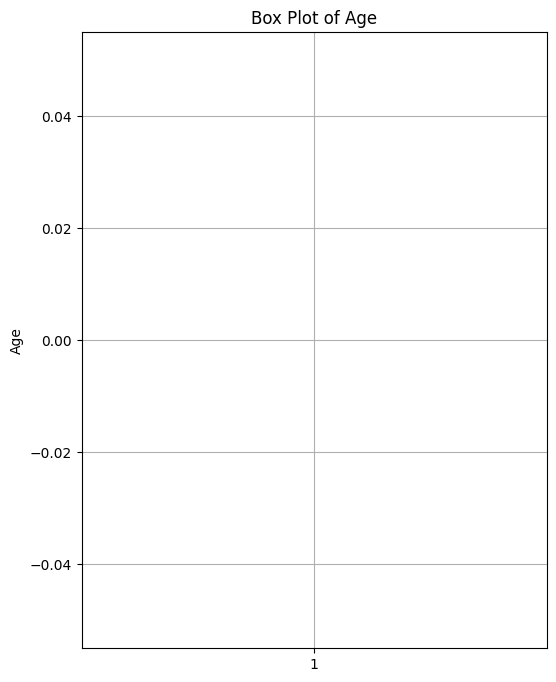

In [ ]:
plt.figure(figsize=(6, 8))
plt.boxplot(df['Age'], vert=True)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()


In [55]:
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}


In [56]:
df_raw['AgeNumeric'] = df_raw['Age'].map(age_map)
df = df_raw.dropna(subset=['AgeNumeric'])  # Remove "Prefer not to say"


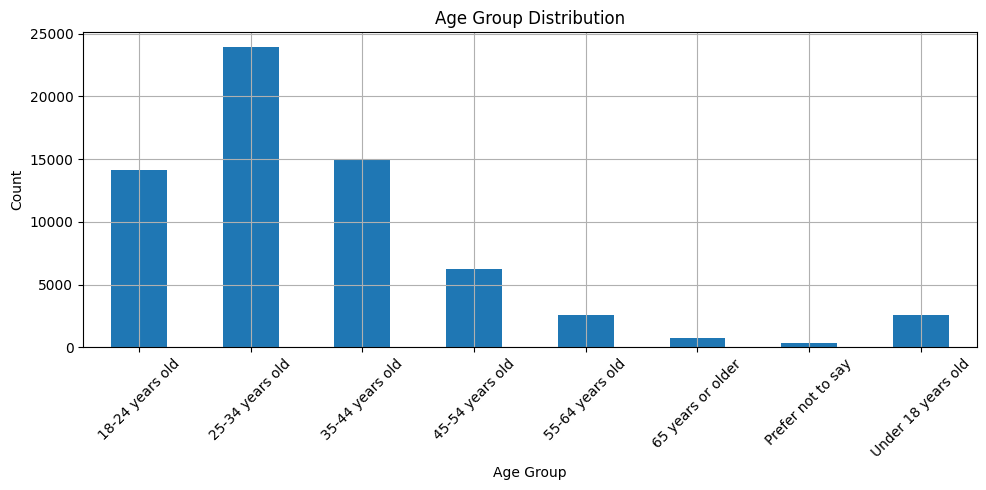

In [57]:
df_raw['Age'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [ ]:
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

workexp_map = {
    'Less than 1 year': 0.5,
    '1-2 years': 1.5,
    '3-5 years': 4,
    '6-8 years': 7,
    '9-11 years': 10,
    '12-14 years': 13,
    '15-17 years': 16,
    '18-20 years': 19,
    '21-23 years': 22,
    '24-26 years': 25,
    '27-29 years': 28,
    '30 or more years': 32,
    'Prefer not to say': None
}


In [64]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('survey-data.sqlite')

# Include the experience column in the query
df = pd.read_sql_query("SELECT Age, YearsCodePro FROM main", conn)
conn.close()



In [65]:
# Map age ranges to approximate numeric values
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# Convert YearsCodePro to numeric
df['WorkExpNumeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where either is missing
df_clean = df.dropna(subset=['AgeNumeric', 'WorkExpNumeric'])



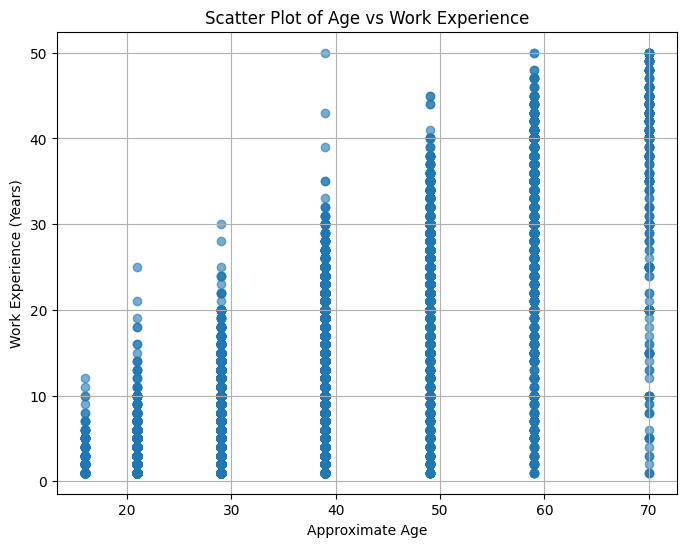

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_clean['AgeNumeric'], df_clean['WorkExpNumeric'], alpha=0.6)
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Approximate Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [75]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT TimeSearching, Frustration, Age FROM main", conn)
conn.close()

# See what's in the raw data
print(df.head(10))
print(df['TimeSearching'].unique())
print(df['Frustration'].unique())
print(df['Age'].unique())


  TimeSearching Frustration                 Age
0          None        None  Under 18 years old
1          None        None     35-44 years old
2          None        None     45-54 years old
3          None        None     18-24 years old
4          None        None     18-24 years old
5          None        None  Under 18 years old
6          None        None     35-44 years old
7          None        None     18-24 years old
8          None        None     45-54 years old
9          None        None     35-44 years old
[None '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']
[None
 'Amount of technical debt;Number of software tools in use;Tracking my work;Showing my contributions'
 'Amount of technical debt;Complexity of tech stack for deployment'
 'Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Maintaining security of code being produced'
 'Amount of technica

In [76]:
time_map = {
    'Less than 1 minute': 0.5,
    '1-5 minutes': 3,
    '6-10 minutes': 8,
    '11-20 minutes': 15,
    'More than 20 minutes': 25
}

frustration_map = {
    'Not at all': 1,
    'A little': 2,
    'Moderately': 3,
    'Very': 4,
    'Extremely': 5
}

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mappings
df['TimeSearchingMapped'] = df['TimeSearching'].map(time_map)
df['FrustrationMapped'] = df['Frustration'].map(frustration_map)
df['AgeMapped'] = df['Age'].map(age_map)

# Drop missing
df_clean = df.dropna(subset=['TimeSearchingMapped', 'FrustrationMapped', 'AgeMapped'])


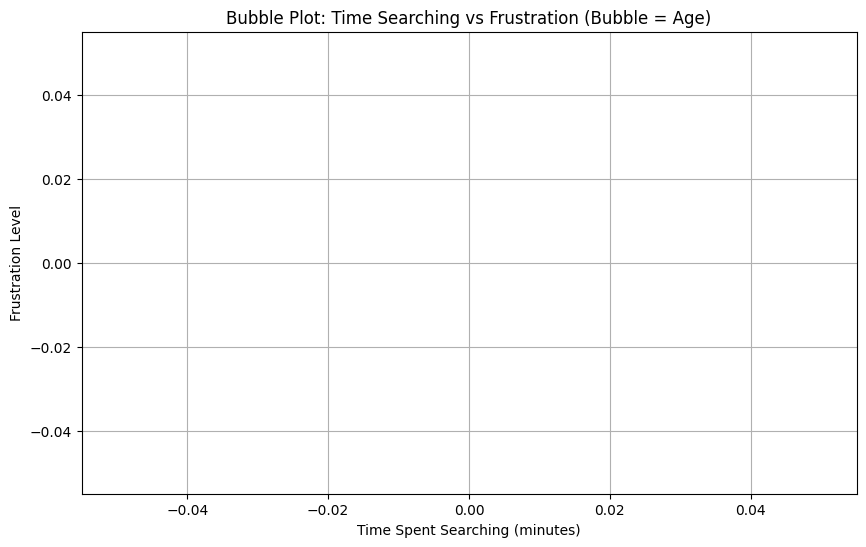

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['TimeSearchingMapped'],
    df_clean['FrustrationMapped'],
    s=df_clean['AgeMapped'] * 3,
    alpha=0.6,
    edgecolors='black'
)
plt.title('Bubble Plot: Time Searching vs Frustration (Bubble = Age)')
plt.xlabel('Time Spent Searching (minutes)')
plt.ylabel('Frustration Level')
plt.grid(True)
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [78]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Load the column with database preferences
df = pd.read_sql_query("SELECT DatabaseWantToWorkWith FROM main", conn)

conn.close()


In [80]:
# Drop rows with missing values
df = df.dropna(subset=['DatabaseWantToWorkWith'])

# Split comma-separated databases into a list
df_exploded = df['DatabaseWantToWorkWith'].str.split(',').explode()

# Remove extra whitespace
df_exploded = df_exploded.str.strip()

# Count frequency of each database
db_counts = df_exploded.value_counts()

# Select top 5
top_5 = db_counts.head(5)


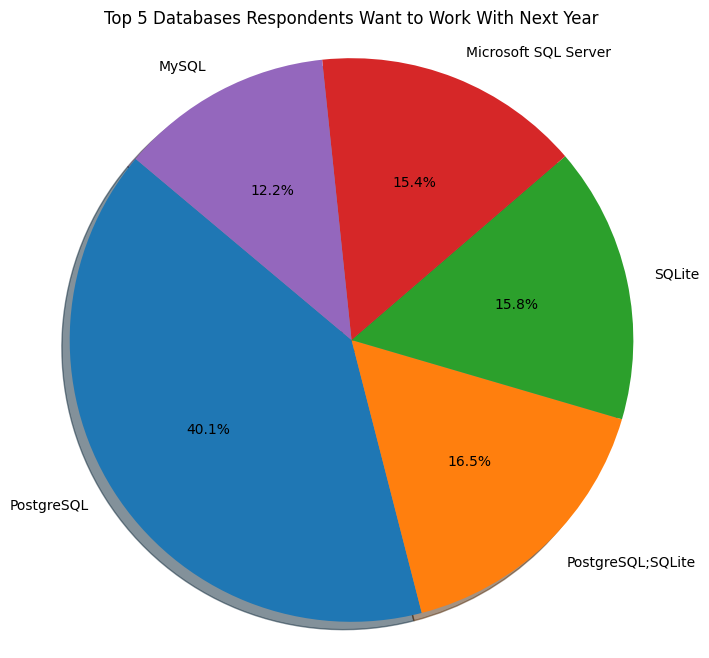

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    top_5,
    labels=top_5.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.axis('equal')  # Equal aspect ratio ensures it's a circle.
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [93]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('survey-data.sqlite')

df = pd.read_sql_query("SELECT Age, TimeSearching, TimeAnswering FROM main", conn)
conn.close()


In [94]:
# Map age groups to numeric approximations
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# Convert time columns to numeric
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['TimeAnswering'] = pd.to_numeric(df['TimeAnswering'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['AgeNumeric', 'TimeSearching', 'TimeAnswering'])


In [95]:
df_filtered = df[df['Age'].isin(['25-34 years old', '35-44 years old'])]


In [96]:
df_filtered['TimeSearching'] = pd.to_numeric(df_filtered['TimeSearching'], errors='coerce')
df_filtered['TimeAnswering'] = pd.to_numeric(df_filtered['TimeAnswering'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['TimeSearching', 'TimeAnswering'])


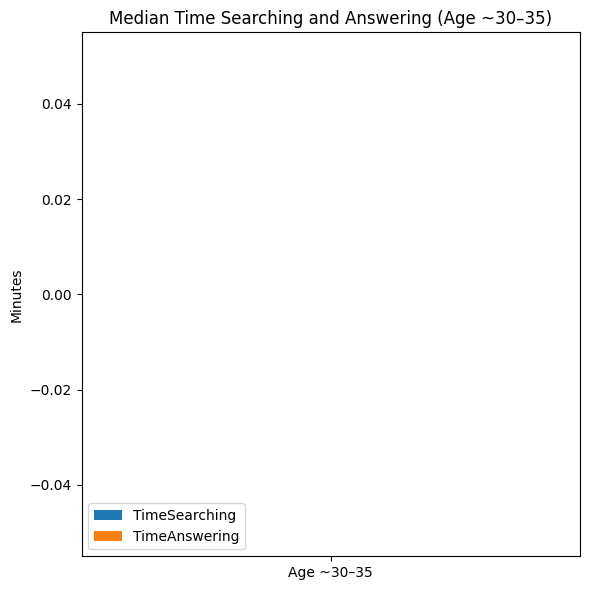

In [97]:
median_search = df_filtered['TimeSearching'].median()
median_answer = df_filtered['TimeAnswering'].median()

import matplotlib.pyplot as plt

labels = ['Age ~30–35']
search_bar = [median_search]
answer_bar = [median_answer]

plt.figure(figsize=(6, 6))
plt.bar(labels, search_bar, label='TimeSearching')
plt.bar(labels, answer_bar, bottom=search_bar, label='TimeAnswering')
plt.title('Median Time Searching and Answering (Age ~30–35)')
plt.ylabel('Minutes')
plt.legend()
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


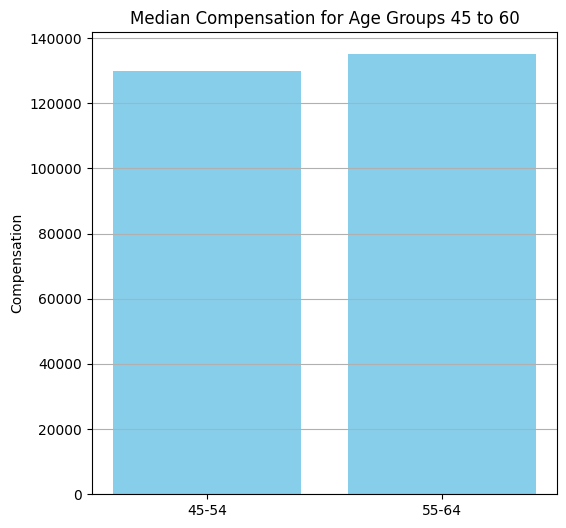

In [100]:
# plot the median CompTotal for all ages from 45 to 60

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)
conn.close()

# Step 2: Map Age to groups
age_map = {
    'Under 18 years old': None,
    '18-24 years old': None,
    '25-34 years old': None,
    '35-44 years old': None,
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': None,
    'Prefer not to say': None
}

df['AgeGroup'] = df['Age'].map(age_map)

# Step 3: Clean and group
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['AgeGroup', 'CompTotal'])

# Step 4: Compute medians per age group
median_comp = df.groupby('AgeGroup')['CompTotal'].median().sort_index()

# Step 5: Plot
plt.figure(figsize=(6, 6))
plt.bar(median_comp.index, median_comp.values, color='skyblue')
plt.title('Median Compensation for Age Groups 45 to 60')
plt.ylabel('Compensation')
plt.grid(axis='y')
plt.show()



**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


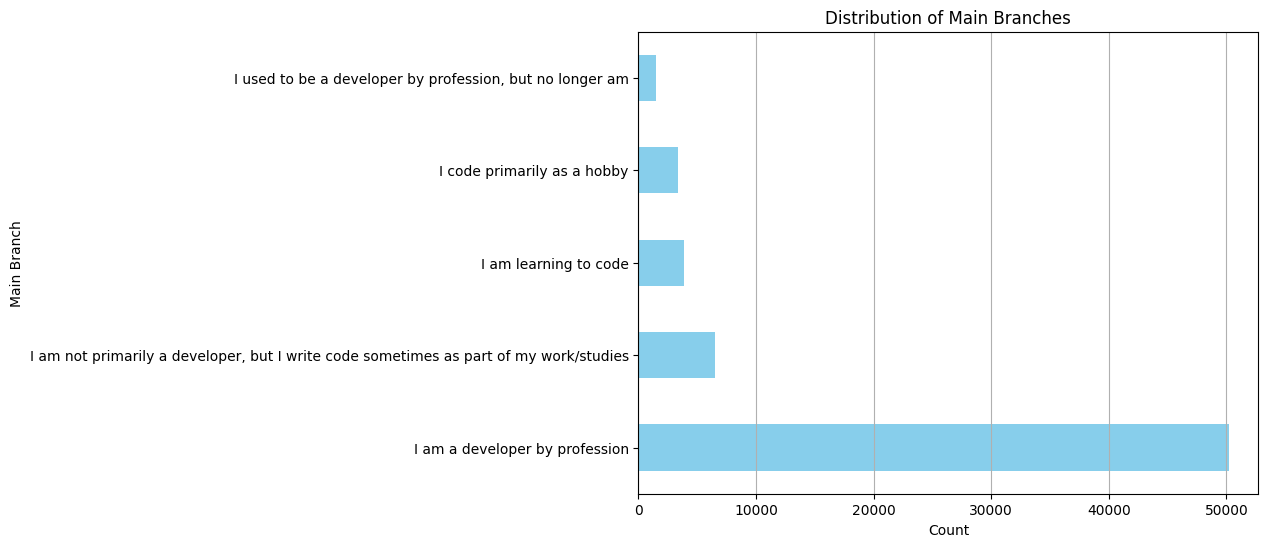

In [101]:
# create a horizontal bar chart using the MainBranch column

import sqlite3
import pandas as pd

conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT MainBranch FROM main", conn)
conn.close()

df['MainBranch'] = df['MainBranch'].str.strip()  # Clean whitespace
df_counts = df['MainBranch'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Main Branches')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.grid(axis='x')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [102]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
